In [1]:
# Define Tasks
## we need to predict item_cnt_month from item id 

In [2]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
# Data Loading
sales_train = pd.read_csv('data/sales_train.csv', parse_dates=[0])
items = pd.read_csv('data/items.csv')
shops = pd.read_csv('data/shops.csv')
item_categories = pd.read_csv('data/item_categories.csv')
test = pd.read_csv('data/test.csv')
sample_submission = pd.read_csv('data/sample_submission.csv')

In [4]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-02-01,0,59,22154,999.00,1.0
1,2013-03-01,0,25,2552,899.00,1.0
2,2013-05-01,0,25,2552,899.00,-1.0
3,2013-06-01,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [5]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [6]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [7]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [8]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [9]:
sample_submission.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [10]:
## Data Time Range

# EDA1
## head
## Info
## Data type
## Missing value
## Null Value
## Shape of data
## Duplicate
print("----------Top-5- Record----------")
print(sales_train.head(5))
print("-----------Information-----------")
print(sales_train.info())
print("-----------Data Types-----------")
print(sales_train.dtypes)
print("----------Missing value-----------")
print(sales_train.isnull().sum())
print("----------Null value-----------")
print(sales_train.isna().sum())
print("----------Shape of Data----------")
print(sales_train.shape)
print('Number of duplicates:', len(sales_train[sales_train.duplicated()]))


----------Top-5- Record----------
        date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0 2013-02-01               0       59    22154      999.00           1.0
1 2013-03-01               0       25     2552      899.00           1.0
2 2013-05-01               0       25     2552      899.00          -1.0
3 2013-06-01               0       25     2554     1709.05           1.0
4 2013-01-15               0       25     2555     1099.00           1.0
-----------Information-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              datetime64[ns]
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 134.4 MB
None
-----------Data Types-----------
date              datetime64[ns]
date_block_num             int64
shop_id                    int64
item_id          

In [11]:
# Downcasting
## int64, int32 → int16
## float64 → int32
def downcast_dtypes(df):
    float_cols = [c for c in df if df[c].dtype == "float64"]
    int_cols = [c for c in df if df[c].dtype in ["int64", "int32"]]
    df[float_cols] = df[float_cols].astype(np.float32)
    df[int_cols] = df[int_cols].astype(np.int16)
    return df

sales_train = downcast_dtypes(sales_train)
print(sales_train.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              datetime64[ns]
date_block_num    int16
shop_id           int16
item_id           int16
item_price        float32
item_cnt_day      float32
dtypes: datetime64[ns](1), float32(2), int16(3)
memory usage: 61.6 MB
None


In [12]:
## Date Attribute
sales_train["year"] = pd.to_datetime(sales_train["date"]).dt.year
sales_train["month"] = pd.to_datetime(sales_train["date"]).dt.month
sales_train["day"] = pd.to_datetime(sales_train["date"]).dt.day


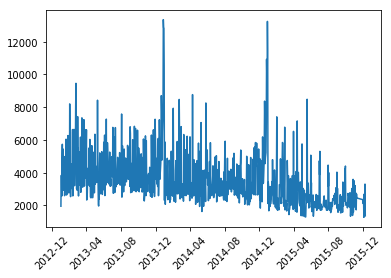

In [13]:
## Plot target(by Time Series)

revenueByDate = pd.DataFrame(sales_train.groupby('date', as_index=False)['item_cnt_day'].sum())
plt.plot( "date", "item_cnt_day", data = revenueByDate.sort_values(by="date"))
plt.xticks(rotation=45)
plt.show()


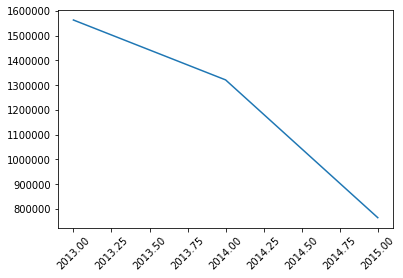

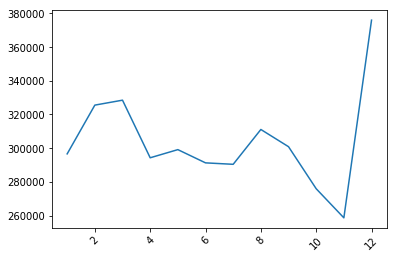

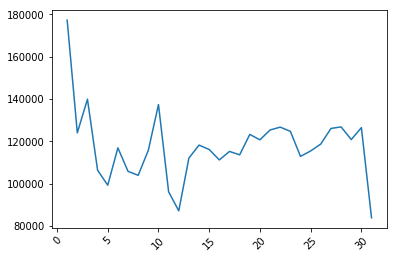

In [14]:
revenueByYear = pd.DataFrame(sales_train.groupby('year', as_index=False)['item_cnt_day'].sum())
plt.plot( "year", "item_cnt_day", data = revenueByYear.sort_values(by="year"))
plt.xticks(rotation=45)
plt.show()

revenueByMonth = pd.DataFrame(sales_train.groupby('month', as_index=False)['item_cnt_day'].sum())
plt.plot( "month", "item_cnt_day", data = revenueByMonth.sort_values(by="month"))
plt.xticks(rotation=45)
plt.show()

revenueByDay = pd.DataFrame(sales_train.groupby('day', as_index=False)['item_cnt_day'].sum())
plt.plot( "day", "item_cnt_day", data = revenueByDay.sort_values(by="day"))
plt.xticks(rotation=45)
plt.show()

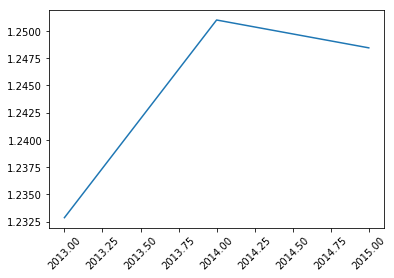

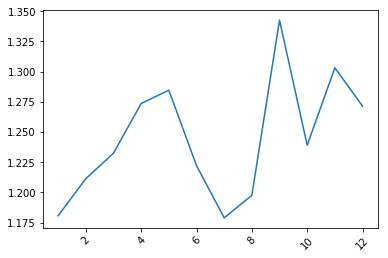

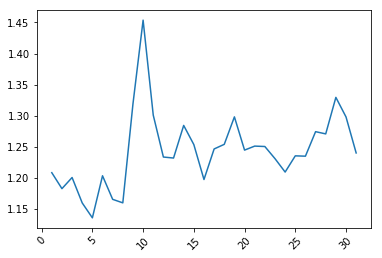

In [15]:
revenueByYear = pd.DataFrame(sales_train.groupby('year', as_index=False)['item_cnt_day'].mean())
plt.plot( "year", "item_cnt_day", data = revenueByYear.sort_values(by="year"))
plt.xticks(rotation=45)
plt.show()

revenueByMonth = pd.DataFrame(sales_train.groupby('month', as_index=False)['item_cnt_day'].mean())
plt.plot( "month", "item_cnt_day", data = revenueByMonth.sort_values(by="month"))
plt.xticks(rotation=45)
plt.show()

revenueByDay = pd.DataFrame(sales_train.groupby('day', as_index=False)['item_cnt_day'].mean())
plt.plot( "day", "item_cnt_day", data = revenueByDay.sort_values(by="day"))
plt.xticks(rotation=45)
plt.show()

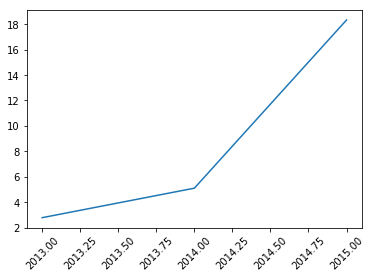

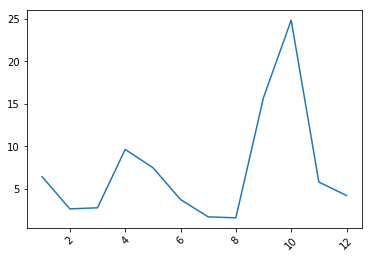

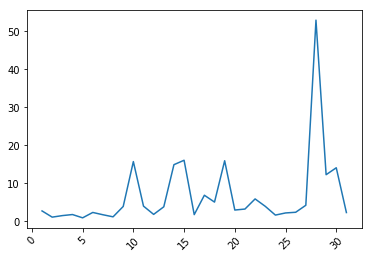

In [16]:
revenueByYear = pd.DataFrame(sales_train.groupby('year', as_index=False)['item_cnt_day'].var())
plt.plot( "year", "item_cnt_day", data = revenueByYear.sort_values(by="year"))
plt.xticks(rotation=45)
plt.show()

revenueByMonth = pd.DataFrame(sales_train.groupby('month', as_index=False)['item_cnt_day'].var())
plt.plot( "month", "item_cnt_day", data = revenueByMonth.sort_values(by="month"))
plt.xticks(rotation=45)
plt.show()

revenueByDay = pd.DataFrame(sales_train.groupby('day', as_index=False)['item_cnt_day'].var())
plt.plot( "day", "item_cnt_day", data = revenueByDay.sort_values(by="day"))
plt.xticks(rotation=45)
plt.show()

In [17]:
## Outdated product/shop
### Confirm train
### Confirm test
sales_by_shop_id = sales_train.pivot_table(index=['shop_id'],values=['item_cnt_day'], 
                                        columns='date_block_num', aggfunc=np.sum, fill_value=0).reset_index()
sales_by_shop_id.columns = sales_by_shop_id.columns.droplevel().map(str)
sales_by_shop_id = sales_by_shop_id.reset_index(drop=True).rename_axis(None, axis=1)
sales_by_shop_id.columns.values[0] = 'shop_id'

for i in range(6,34):
    print('Not exists in month',i,sales_by_shop_id['shop_id'][sales_by_shop_id.loc[:,'0':str(i)].sum(axis=1)==0].unique())

for i in range(6,34):
    print('Shop is outdated for month',i,sales_by_shop_id['shop_id'][sales_by_shop_id.loc[:,str(i):].sum(axis=1)==0].unique())


Not exists in month 6 [ 9 11 20 33 34 36 39 40 48 49]
Not exists in month 7 [ 9 11 20 33 34 36 39 40 48 49]
Not exists in month 8 [ 9 11 20 33 34 36 39 40 48 49]
Not exists in month 9 [11 20 33 34 36 39 40 48 49]
Not exists in month 10 [11 20 33 34 36 39 40 48 49]
Not exists in month 11 [11 20 33 34 36 39 40 48]
Not exists in month 12 [11 20 33 34 36 39 40 48]
Not exists in month 13 [11 20 33 34 36 39 40 48]
Not exists in month 14 [11 20 33 34 36 48]
Not exists in month 15 [11 20 33 34 36]
Not exists in month 16 [11 20 33 34 36]
Not exists in month 17 [11 20 33 34 36]
Not exists in month 18 [11 20 33 36]
Not exists in month 19 [11 20 36]
Not exists in month 20 [11 20 36]
Not exists in month 21 [11 36]
Not exists in month 22 [11 36]
Not exists in month 23 [11 36]
Not exists in month 24 [11 36]
Not exists in month 25 [36]
Not exists in month 26 [36]
Not exists in month 27 [36]
Not exists in month 28 [36]
Not exists in month 29 [36]
Not exists in month 30 [36]
Not exists in month 31 [36]


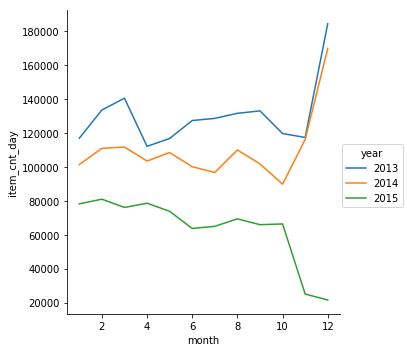

In [18]:
## Plot Each year

monthlyRev = pd.DataFrame(sales_train.groupby(["month", "year"], as_index=False)["item_cnt_day"].sum())
monthlyRev.head()

g = sns.FacetGrid(data = monthlyRev.sort_values(by="month"), hue = "year", size = 5, legend_out=True)
g = g.map(plt.plot, "month", "item_cnt_day")
g.add_legend()
g

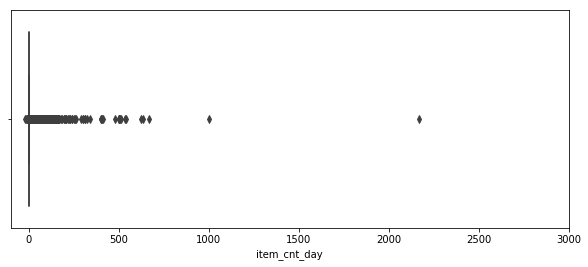

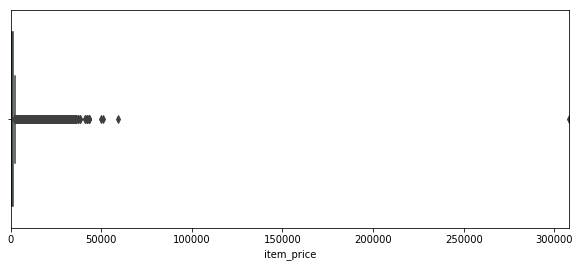

In [19]:
plt.figure(figsize=(10,4))
plt.xlim(-100, 3000)
sns.boxplot(x=sales_train['item_cnt_day'])

plt.figure(figsize=(10,4))
plt.xlim(sales_train['item_price'].min(), sales_train['item_price'].max())
sns.boxplot(x=sales_train['item_price'])


In [20]:
print('Sale volume outliers:',sales_train['item_id'][sales_train['item_cnt_day']>500].unique())
print('Item price outliers:',sales_train['item_id'][sales_train['item_price']>50000].unique())

Sale volume outliers: [ 8057 20949  9242 19437  3731 11373  9249  9248]
Item price outliers: [11365  6066 13199]


In [21]:
# 外れ値の削除
sales_train = sales_train[sales_train.item_cnt_day<500]
sales_train = sales_train[sales_train.item_price<50000]

In [22]:
monthlyRev_sum = pd.DataFrame(sales_train.groupby(["shop_id", "item_id","year","month"], as_index=False)["item_cnt_day"].sum())
monthlyRev_avg = pd.DataFrame(sales_train.groupby(["shop_id", "item_id","year","month"], as_index=False)["item_cnt_day"].mean())

In [23]:
monthlyRev_sum.head()

,shop_id,item_id,year,month,item_cnt_day
0,0,30,2013,2,31.0
1,0,31,2013,2,11.0
2,0,32,2013,1,4.0
3,0,32,2013,2,6.0
4,0,32,2013,3,2.0


In [24]:
monthlyRev_avg.head()

,shop_id,item_id,year,month,item_cnt_day
0,0,30,2013,2,3.444444
1,0,31,2013,2,1.571429
2,0,32,2013,1,1.333333
3,0,32,2013,2,1.500000
4,0,32,2013,3,2.000000


In [25]:
monthlyPri_sum = pd.DataFrame(sales_train.groupby(["shop_id", "item_id","year","month"], as_index=False)["item_price"].sum())
monthlyPri_avg = pd.DataFrame(sales_train.groupby(["shop_id", "item_id","year","month"], as_index=False)["item_price"].mean())

In [26]:
monthlyPri_sum.head()

,shop_id,item_id,year,month,item_price
0,0,30,2013,2,2385.0
1,0,31,2013,2,3038.0
2,0,32,2013,1,663.0
3,0,32,2013,2,884.0
4,0,32,2013,3,221.0


In [27]:
monthlyPri_avg.head()

,shop_id,item_id,year,month,item_price
0,0,30,2013,2,265.0
1,0,31,2013,2,434.0
2,0,32,2013,1,221.0
3,0,32,2013,2,221.0
4,0,32,2013,3,221.0


In [28]:
sales_train =  pd.merge(sales_train, items, on=["item_id"], how='inner')

In [29]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,day,item_name,item_category_id
0,2013-02-01,0,59,22154,999.0,1.0,2013,2,1,ЯВЛЕНИЕ 2012 (BD),37
1,2013-01-23,0,24,22154,999.0,1.0,2013,1,23,ЯВЛЕНИЕ 2012 (BD),37
2,2013-01-20,0,27,22154,999.0,1.0,2013,1,20,ЯВЛЕНИЕ 2012 (BD),37
3,2013-02-01,0,25,22154,999.0,1.0,2013,2,1,ЯВЛЕНИЕ 2012 (BD),37
4,2013-03-01,0,25,22154,999.0,1.0,2013,3,1,ЯВЛЕНИЕ 2012 (BD),37


In [30]:
grid = pd.DataFrame(sales_train.groupby(["shop_id", "item_id","item_category_id", "year","month"], as_index=False)["item_cnt_day"].sum())

In [31]:
grid_new= grid.rename(columns={'item_cnt_day': 'shop_item_year_month_item_cat_cnt'})

In [32]:
var = pd.DataFrame(sales_train.groupby(["shop_id", "item_id","item_category_id", "year","month"], as_index=False)["item_cnt_day"].var())
var= var.rename(columns={'item_cnt_day': 'shop_item_year_month_item_cat_var'})

In [33]:
var.head()

,shop_id,item_id,item_category_id,year,month,shop_item_year_month_item_cat_var
0,0,30,40,2013,2,5.027778
1,0,31,37,2013,2,0.952381
2,0,32,40,2013,1,0.333333
3,0,32,40,2013,2,0.333333
4,0,32,40,2013,3,NaN


In [34]:
grid = pd.merge(grid_new, var, on=["shop_id", "item_id","year","month"], how='inner')

In [35]:
grid.isnull().any()

shop_id                              False
item_id                              False
item_category_id_x                   False
year                                 False
month                                False
shop_item_year_month_item_cat_cnt    False
item_category_id_y                   False
shop_item_year_month_item_cat_var     True
dtype: bool

In [36]:
grid = grid.fillna(grid["shop_item_year_month_item_cat_var"].mean())

In [37]:
grid = downcast_dtypes(grid)

In [38]:
grid.drop("item_category_id_x", axis=1, inplace=True)

In [39]:
grid.head()

,shop_id,item_id,year,month,shop_item_year_month_item_cat_cnt,item_category_id_y,shop_item_year_month_item_cat_var
0,0,30,2013,2,31.0,40,5.027778
1,0,31,2013,2,11.0,37,0.952381
2,0,32,2013,1,4.0,40,0.333333
3,0,32,2013,2,6.0,40,0.333333
4,0,32,2013,3,2.0,40,1.865565


In [40]:
mean = pd.DataFrame(sales_train.groupby(["shop_id", "item_id","item_category_id", "year","month"], as_index=False)["item_cnt_day"].mean())
mean= var.rename(columns={'item_cnt_day': 'shop_item_year_month_item_cat_avg'})

In [41]:
mean = pd.DataFrame(sales_train.groupby(["shop_id", "item_id","item_category_id", "year","month"], as_index=False)["item_cnt_day"].mean())
mean= var.rename(columns={'item_cnt_day': 'shop_item_year_month_item_cat_avg'})

In [42]:
mean = pd.DataFrame(sales_train.groupby(["shop_id", "item_id","item_category_id", "year","month"], as_index=False)["item_cnt_day"].mean())


In [43]:
mean= mean.rename(columns={'item_cnt_day': 'shop_item_year_month_item_cat_avg'})

In [44]:
mean.head()

,shop_id,item_id,item_category_id,year,month,shop_item_year_month_item_cat_avg
0,0,30,40,2013,2,3.444444
1,0,31,37,2013,2,1.571429
2,0,32,40,2013,1,1.333333
3,0,32,40,2013,2,1.500000
4,0,32,40,2013,3,2.000000


In [45]:
grid = pd.merge(grid, mean, on=["shop_id", "item_id","year","month"], how='inner')

In [46]:
grid.head()

,shop_id,item_id,year,month,shop_item_year_month_item_cat_cnt,item_category_id_y,shop_item_year_month_item_cat_var,item_category_id,shop_item_year_month_item_cat_avg
0,0,30,2013,2,31.0,40,5.027778,40,3.444444
1,0,31,2013,2,11.0,37,0.952381,37,1.571429
2,0,32,2013,1,4.0,40,0.333333,40,1.333333
3,0,32,2013,2,6.0,40,0.333333,40,1.500000
4,0,32,2013,3,2.0,40,1.865565,40,2.000000


In [47]:
grid = grid.fillna(grid["shop_item_year_month_item_cat_avg"].mean())

In [48]:
grid.head()

,shop_id,item_id,year,month,shop_item_year_month_item_cat_cnt,item_category_id_y,shop_item_year_month_item_cat_var,item_category_id,shop_item_year_month_item_cat_avg
0,0,30,2013,2,31.0,40,5.027778,40,3.444444
1,0,31,2013,2,11.0,37,0.952381,37,1.571429
2,0,32,2013,1,4.0,40,0.333333,40,1.333333
3,0,32,2013,2,6.0,40,0.333333,40,1.500000
4,0,32,2013,3,2.0,40,1.865565,40,2.000000


In [49]:
cnt_month = pd.DataFrame(sales_train.groupby(["shop_id", "item_id","year","month"], as_index=False)["item_cnt_day"].sum())
cnt_month = cnt_month.rename(columns={'item_cnt_day': 'item_cnt_month'})

In [50]:
grid = pd.merge(grid, cnt_month, on=["shop_id", "item_id","year","month"], how='inner')

In [51]:
trainy = grid.iloc[:, -1]

In [52]:
trainx = grid.iloc[:, 0:9]

In [53]:
test["year"] = 2015
test["month"] = 11
test = pd.merge(test, grid, on=["shop_id", "item_id","year","month"], how="left")

In [54]:
item_id = test[["ID", "item_id"]]
test.drop("ID", axis=1, inplace=True)

In [55]:
test.drop("item_cnt_month", axis=1, inplace=True)
test.drop("item_category_id_y", axis=1, inplace=True)

In [57]:
test.isnull().any()
test["shop_item_year_month_item_cat_avg"] = test["shop_item_year_month_item_cat_avg"].fillna(grid["shop_item_year_month_item_cat_avg"].mean())

In [58]:
test["shop_item_year_month_item_cat_cnt"] = test["shop_item_year_month_item_cat_cnt"].fillna(grid["shop_item_year_month_item_cat_cnt"].mean())
test["shop_item_year_month_item_cat_var"] = test["shop_item_year_month_item_cat_var"].fillna(grid["shop_item_year_month_item_cat_var"].mean())

In [59]:
trainx.head()

,shop_id,item_id,year,month,shop_item_year_month_item_cat_cnt,item_category_id_y,shop_item_year_month_item_cat_var,item_category_id,shop_item_year_month_item_cat_avg
0,0,30,2013,2,31.0,40,5.027778,40,3.444444
1,0,31,2013,2,11.0,37,0.952381,37,1.571429
2,0,32,2013,1,4.0,40,0.333333,40,1.333333
3,0,32,2013,2,6.0,40,0.333333,40,1.500000
4,0,32,2013,3,2.0,40,1.865565,40,2.000000


In [60]:
trainx.drop("item_category_id", axis=1, inplace=True)
trainx.drop("item_category_id_y", axis=1, inplace=True)

In [61]:
test.drop("item_category_id", axis=1, inplace=True)

In [62]:
trainx.head()

,shop_id,item_id,year,month,shop_item_year_month_item_cat_cnt,shop_item_year_month_item_cat_var,shop_item_year_month_item_cat_avg
0,0,30,2013,2,31.0,5.027778,3.444444
1,0,31,2013,2,11.0,0.952381,1.571429
2,0,32,2013,1,4.0,0.333333,1.333333
3,0,32,2013,2,6.0,0.333333,1.500000
4,0,32,2013,3,2.0,1.865565,2.000000


In [64]:
test.head()

,shop_id,item_id,year,month,shop_item_year_month_item_cat_cnt,shop_item_year_month_item_cat_var,shop_item_year_month_item_cat_avg
0,5,5037,2015,11,2.022078,1.83642,1.10499
1,5,5320,2015,11,2.022078,1.83642,1.10499
2,5,5233,2015,11,2.022078,1.83642,1.10499
3,5,5232,2015,11,2.022078,1.83642,1.10499
4,5,5268,2015,11,2.022078,1.83642,1.10499


In [65]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf = clf.fit(trainx, trainy)

In [66]:
pred = clf.predict(test)

In [67]:
pred = pd.DataFrame(pred)

In [68]:
item_id.head()

,ID,item_id
0,0,5037
1,1,5320
2,2,5233
3,3,5232
4,4,5268


In [69]:
pred = pred.reset_index()
item_id = item_id.reset_index()

In [70]:
pred = pd.merge(item_id, pred, on="index")
pred = pred.rename(columns={0: 'item_cnt_month'})

In [1]:
test.shape

NameError: name 'test' is not defined

In [72]:
pred.drop("index", axis=1, inplace=True)

In [73]:
pred.drop("item_id", axis=1, inplace=True)

In [74]:
pred.to_csv("data/submit.csv", index=None)